In [ ]:
def log_loss(y, y_hat):
  loss = y*np.log(y_hat)+(1-y)*np.log(1-y_hat)
  return -loss

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [22]:
churn.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Intl Plan', 'VMail Plan', 'Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge',
       'Intl Calls', 'Intl Charge', 'State', 'Area Code', 'Phone', 'Churn'],
      dtype='object')

In [23]:
cols = ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']
y = churn["Churn"]
y = np.array(y).reshape(len(y), 1) #Reshaping our data to (m,1) shape. Not compulsory
X = churn[cols]
X.shape

(5700, 5)

In [24]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)
X_train.shape


(3420, 5)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train

array([[-1.8525591 , -0.54121117,  1.87596728,  0.0724823 ,  2.13378709],
       [ 0.93155078,  1.05292599,  0.39854651, -0.54879454, -0.81991418],
       [ 0.46912157,  0.11462924,  1.13324217,  0.0724823 , -2.27130187],
       ...,
       [-0.52565742, -0.04014136, -0.68543069,  0.69375914,  0.55508469],
       [-0.94359172, -0.58957698, -0.37428909,  1.93631281, -0.36158122],
       [-0.58604336,  2.40910335,  1.70935597,  0.69375914, -0.25972945]])

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

print("coef = ",model.coef_)
print("intercept = ",model.intercept_)

coef =  [[0.68445262 0.29104301 0.1363756  0.79630985 0.06125924]]
intercept =  [-0.01220319]


C:\Users\Vijay\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
pd.DataFrame({
    'Feature': ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length'], 
    'Coefficient': model.coef_[0]  # flatten to 1D array
})


,Feature,Coefficient
0,Day Mins,0.684453
1,Eve Mins,0.291043
2,Night Mins,0.136376
3,CustServ Calls,0.796310
4,Account Length,0.061259


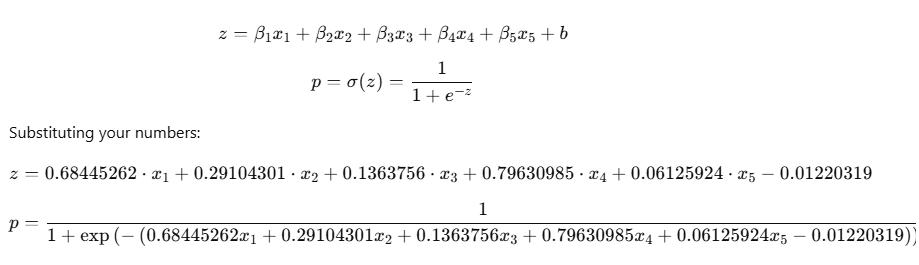

In [19]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0])

In [21]:
model.predict_proba(X_test)

array([[0.23933095, 0.76066905],
       [0.54163766, 0.45836234],
       [0.78613124, 0.21386876],
       ...,
       [0.55603164, 0.44396836],
       [0.22971275, 0.77028725],
       [0.76042272, 0.23957728]])

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,model.predict(X_test))

0.7008771929824561

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load data
churn = pd.read_csv("churn_logistic.csv")

# Select numerical features only (exclude the target column 'Churn')
X = churn.select_dtypes(include=['number']).drop(columns=['Churn'], errors='ignore')
y = churn['Churn']

# Train-test split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7403508771929824
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       570
           1       0.75      0.72      0.73       570

    accuracy                           0.74      1140
   macro avg       0.74      0.74      0.74      1140
weighted avg       0.74      0.74      0.74      1140



C:\Users\Vijay\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
